In [124]:
import pandas as pd
import numpy as np
% matplotlib inline
import matplotlib.pyplot as plt

In [181]:
df = pd.read_csv("../data/spi_matches.csv", parse_dates=["date"])

In [182]:
len(df)

21126

In [183]:
df_prem_pred = df[(df.score1.isnull()) & (df.league == "Barclays Premier League") & (df.probtie > 0.3)]
df_prem_pred

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
17404,2019-01-19,2411,Barclays Premier League,Wolverhampton,Leicester City,69.77,71.30,0.4167,0.2752,0.3081,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18544,2019-02-23,2411,Barclays Premier League,Leicester City,Crystal Palace,71.30,71.09,0.4360,0.2583,0.3057,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18573,2019-02-23,2411,Barclays Premier League,Newcastle,Huddersfield Town,62.18,58.04,0.4780,0.2137,0.3083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18717,2019-02-26,2411,Barclays Premier League,Huddersfield Town,Wolverhampton,58.04,69.77,0.3105,0.3703,0.3192,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18806,2019-03-02,2411,Barclays Premier League,Brighton and Hove Albion,Huddersfield Town,63.29,58.04,0.4934,0.2056,0.3010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19840,2019-04-06,2411,Barclays Premier League,Huddersfield Town,Leicester City,58.04,71.30,0.2958,0.3874,0.3168,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19841,2019-04-06,2411,Barclays Premier League,Newcastle,Crystal Palace,62.18,71.09,0.3426,0.3455,0.3119,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20485,2019-04-27,2411,Barclays Premier League,Brighton and Hove Albion,Newcastle,63.29,62.18,0.4480,0.2501,0.3020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20646,2019-05-04,2411,Barclays Premier League,Cardiff City,Crystal Palace,58.89,71.09,0.3201,0.3797,0.3002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
df_rus_pred = df[(df.score1.isnull()) & (df.league == "Russian Premier Liga") & (df.probtie > 0.337)]
df_rus_pred

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
18882,2019-03-03,1866,Russian Premier Liga,FC Ufa,Dinamo Moscow,47.52,54.81,0.3716,0.2671,0.3614,...,39.8,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18885,2019-03-03,1866,Russian Premier Liga,Rubin Kazan,Terek Grozny,55.98,50.90,0.4788,0.1825,0.3386,...,22.6,5.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19373,2019-03-17,1866,Russian Premier Liga,Rubin Kazan,Rostov,55.98,52.69,0.4297,0.1918,0.3785,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19377,2019-03-17,1866,Russian Premier Liga,FC Ufa,Terek Grozny,47.52,50.90,0.3739,0.2641,0.3620,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19879,2019-04-07,1866,Russian Premier Liga,FC Ufa,Rostov,47.52,52.69,0.3465,0.2573,0.3962,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20286,2019-04-21,1866,Russian Premier Liga,Gazovik Orenburg,Rostov,50.05,52.69,0.3827,0.2580,0.3593,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20391,2019-04-23,1866,Russian Premier Liga,Rubin Kazan,FC Ufa,55.98,47.52,0.4912,0.1667,0.3421,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20541,2019-04-28,1866,Russian Premier Liga,Anzhi Makhachkala,Rostov,34.64,52.69,0.2426,0.4009,0.3565,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20544,2019-04-28,1866,Russian Premier Liga,Dinamo Moscow,Terek Grozny,54.81,50.90,0.4492,0.2078,0.3430,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20865,2019-05-12,1866,Russian Premier Liga,Dinamo Moscow,Rostov,54.81,52.69,0.4194,0.2027,0.3780,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
df_italy_b_pred = df[(df.score1.isnull()) & (df.league == "Italy Serie B") & (df.probtie > 0.335)]
df_italy_b_pred

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
18396,2019-02-17,1856,Italy Serie B,Cosenza,Cremonese,22.79,26.15,0.3713,0.2886,0.3401,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19330,2019-03-16,1856,Italy Serie B,F.B.C Unione Venezia,Cremonese,25.20,26.15,0.3997,0.2584,0.3419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20383,2019-04-22,1856,Italy Serie B,Ascoli,F.B.C Unione Venezia,23.19,25.20,0.3864,0.2725,0.3411,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20629,2019-05-01,1856,Italy Serie B,Cosenza,F.B.C Unione Venezia,22.79,25.20,0.3815,0.2784,0.3401,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20846,2019-05-11,1856,Italy Serie B,Carpi,F.B.C Unione Venezia,17.39,25.20,0.3145,0.3500,0.3355,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
len(df)

17228

In [129]:
df["result"] = df.apply(
    lambda row: "H" if row.score1 > row.score2 else (
        "D" if row.score1 == row.score2 else "A"), axis=1)


In [130]:
df["draw_over_30"] = df.probtie.apply(lambda x: 1 if x > 0.30 else 0)

In [131]:
df_pred = df[df.draw_over_30 == 1]

In [132]:
df_pred.loc[:, "success"] = df_pred.apply(lambda row: 1 if row.result == "D" else 0, axis=1)

/Users/alexandergreen/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/alexandergreen/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [133]:
df_draw_by_league = df_pred.groupby("league").agg({"success": ["sum", "count"]}).reset_index()
df_draw_by_league.columns = df_draw_by_league.columns.droplevel()
df_draw_by_league.columns = ["league", "correct", "total"]
df_draw_by_league["accuracy"] = df_draw_by_league.correct / df_draw_by_league.total
df_draw_by_league.sort_values("accuracy", ascending=False)

,league,correct,total,accuracy
6,Danish SAS-Ligaen,5,8,0.625000
2,Barclays Premier League,23,50,0.460000
30,Swedish Allsvenskan,4,9,0.444444
4,Brasileiro Série A,8,20,0.400000
25,Russian Premier Liga,39,98,0.397959
21,Mexican Primera Division Torneo Clausura,17,43,0.395349
17,Italy Serie B,107,297,0.360269
34,UEFA Europa League,10,29,0.344828
29,Spanish Segunda Division,73,218,0.334862
11,French Ligue 1,62,187,0.331551


In [134]:
df_prem = df[df.league == "Barclays Premier League"]

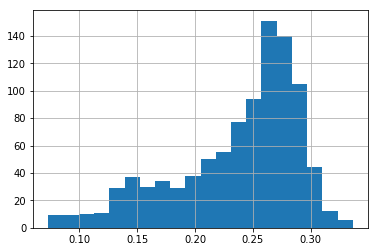

In [135]:
df_prem.probtie.hist(bins=20)

In [136]:
df_prem.probtie.quantile(0.95)

0.30042

# Premmy

In [137]:
betting = pd.concat([pd.read_csv("../data/1617_results.csv", parse_dates=["Date"], dayfirst=True),
                      pd.read_csv("../data/1718_results.csv", parse_dates=["Date"], dayfirst=True),
                      pd.read_csv("../data/1819_results.csv", parse_dates=["Date"], dayfirst=True)])

In [138]:
bet_teams = betting.HomeTeam.unique()
sorted(bet_teams)

['Arsenal',
 'Bournemouth',
 'Brighton',
 'Burnley',
 'Cardiff',
 'Chelsea',
 'Crystal Palace',
 'Everton',
 'Fulham',
 'Huddersfield',
 'Hull',
 'Leicester',
 'Liverpool',
 'Man City',
 'Man United',
 'Middlesbrough',
 'Newcastle',
 'Southampton',
 'Stoke',
 'Sunderland',
 'Swansea',
 'Tottenham',
 'Watford',
 'West Brom',
 'West Ham',
 'Wolves']

In [139]:
five38_teams_16 = df_prem.team1.unique()
sorted(five38_teams_16)

['AFC Bournemouth',
 'Arsenal',
 'Brighton and Hove Albion',
 'Burnley',
 'Cardiff City',
 'Chelsea',
 'Crystal Palace',
 'Everton',
 'Fulham',
 'Huddersfield Town',
 'Hull City',
 'Leicester City',
 'Liverpool',
 'Manchester City',
 'Manchester United',
 'Middlesbrough',
 'Newcastle',
 'Southampton',
 'Stoke City',
 'Sunderland',
 'Swansea City',
 'Tottenham Hotspur',
 'Watford',
 'West Bromwich Albion',
 'West Ham United',
 'Wolverhampton']

In [140]:
team_dict = {"AFC Bournemouth": "Bournemouth",
            "Brighton and Hove Albion": "Brighton",
            "Cardiff City": "Cardiff",
            "Huddersfield Town": "Huddersfield",
            "Hull City": "Hull",
            "Leicester City": "Leicester",
            "Manchester United": "Man United",
            "Manchester City": "Man City",
            "Newcastle United": "Newcastle",
            "Stoke City": "Stoke",
            "Swansea City": "Swansea",
            "Tottenham Hotspur": "Tottenham",
            "West Bromwich Albion": "West Brom",
            "West Ham United": "West Ham",
            "Wolverhampton": "Wolves"}

In [141]:
df_prem.loc[:, "team1"] = df_prem.team1.apply(lambda x: team_dict[x] if x in team_dict.keys() else x)

/Users/alexandergreen/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [142]:
df_prem.loc[:, "team2"] = df_prem.team2.apply((lambda x: team_dict[x] if x in team_dict.keys() else x))

/Users/alexandergreen/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [143]:
betting.rename(columns={"HomeTeam": "team1", "AwayTeam": "team2", "Date": "date"}, inplace=True)

In [144]:
merged = pd.merge(betting, df_prem, on=["date", "team1", "team2"])

In [145]:
merged = merged[["team1", "team2", 
                 "BbMxH", "BbMxD", "BbMxA",
                "PSH", "PSD", "PSA", 
                "result", 
                "prob1", "prob2", "probtie"]]

money at end £7736.6978947632
total matches 48
lowest bank £968.25847822515
highest bank £11791.94923756013
ROI 32.0%
Percent of matches bet on 4.95


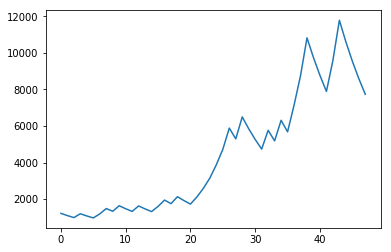

In [147]:
money_history = []
money = 1000
frac = 0.1
total_staked = 0
total_won = 0
odds = []
lose_odds = []
for row in merged.itertuples():
    if row.probtie >= 0.30:
        stake = frac * money
        money -= stake
        total_staked += stake
        if row.result == "D":
            money += stake * row.BbMxD * 0.99
            total_won += stake * row.BbMxD * 0.99
            odds.append(row.BbMxD)
        else:
            lose_odds.append(row.BbMxD)
        money_history.append(money)
plt.plot(money_history)
print("money at end £{}".format(money))
print("total matches {}".format(len(money_history)))
print("lowest bank £{}".format(min(money_history)))
print("highest bank £{}".format(max(money_history)))
print("ROI {}%".format(round(100 * ((total_won / total_staked) - 1), 0)))
print("Percent of matches bet on {}".format(round(len(money_history) * 100 / len(df_prem), 2)))

In [148]:
np.mean(odds)

3.2900000000000005

In [149]:
np.mean(lose_odds)

3.3388000000000004

In [150]:
len(lose_odds)

25

In [151]:
len(odds)

23

# Serie A

In [156]:
df_italy = df[df.league == "Italy Serie A"]

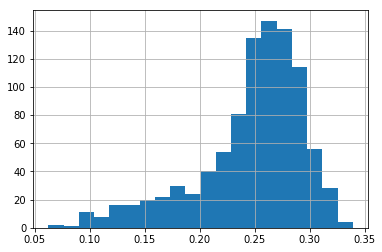

In [157]:
df_italy.probtie.hist(bins=20)

In [158]:
df_italy.probtie.quantile(0.95)

0.30501999999999996

money at end £144.63269314304128
total matches 48
lowest bank £144.63269314304128
highest bank £1356.572043
ROI -28.999999999999996%


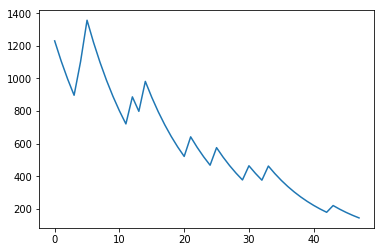

In [159]:
money_history = []
money = 1000
frac = 0.1
total_staked = 0
total_won = 0
for row in df_italy.itertuples():
    if row.probtie >= 0.305:
        stake = frac * money
        money -= stake
        total_staked += stake
        if row.result == "D":
            money += stake * 3.3
            total_won += stake * 3.3
        money_history.append(money)
plt.plot(money_history)
print("money at end £{}".format(money))
print("total matches {}".format(len(money_history)))
print("lowest bank £{}".format(min(money_history)))
print("highest bank £{}".format(max(money_history)))
print("ROI {}%".format(100 * (round((total_won / total_staked) - 1, 2))))
    

# Port

In [160]:
df_port = df[df.league == "Portuguese Liga"]

In [161]:
df_port.probtie.quantile(0.95)

0.3111149999999999

money at end £636.9290837617632
total matches 28
lowest bank £521.6818270797247
highest bank £1090.7071048959856
ROI -17.0%


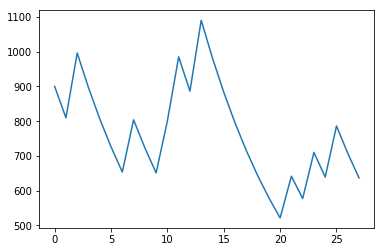

In [162]:
money_history = []
money = 1000
frac = 0.1
total_staked = 0
total_won = 0
for row in df_port.itertuples():
    if row.probtie >= 0.31:
        stake = frac * money
        money -= stake
        total_staked += stake
        if row.result == "D":
            money += stake * 3.3
            total_won += stake * 3.3
        money_history.append(money)
plt.plot(money_history)
print("money at end £{}".format(money))
print("total matches {}".format(len(money_history)))
print("lowest bank £{}".format(min(money_history)))
print("highest bank £{}".format(max(money_history)))
print("ROI {}%".format(100 * (round((total_won / total_staked) - 1, 2))))
    

In [163]:
df.probtie.quantile(0.95)

0.3136

money at end £1400.994751396815
total matches 317
lowest bank £215.59427154885327
highest bank £12736.579211067696
ROI 0.0%


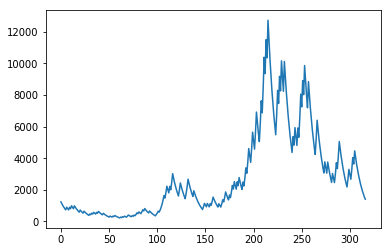

In [166]:
money_history = []
money = 1000
frac = 0.1
total_staked = 0
total_won = 0
for row in df.itertuples():
    if row.probtie >= 0.33:
        stake = frac * money
        money -= stake
        total_staked += stake
        if row.result == "D":
            money += stake * 3.3
            total_won += stake * 3.3
        money_history.append(money)
plt.plot(money_history)
print("money at end £{}".format(money))
print("total matches {}".format(len(money_history)))
print("lowest bank £{}".format(min(money_history)))
print("highest bank £{}".format(max(money_history)))
print("ROI {}%".format(100 * (round((total_won / total_staked) - 1, 2))))
    

# Serie B

In [167]:
df_italy_b = df[df.league == "Italy Serie B"]
df_italy_b.probtie.quantile(0.90)

0.33724

money at end £3203.49024103636
total matches 69
lowest bank £646.4434792432304
highest bank £3954.9262235016795
ROI 17.0%
Percent of matches bet on 10.75


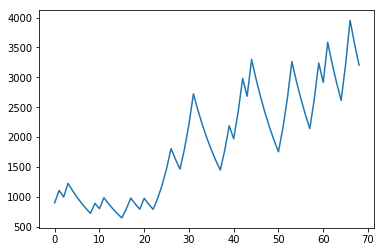

In [173]:
money_history = []
money = 1000
frac = 0.1
total_staked = 0
total_won = 0
for row in df_italy_b.itertuples():
    if row.probtie >= 0.335:
        stake = frac * money
        money -= stake
        total_staked += stake
        if row.result == "D":
            money += stake * 3.3
            total_won += stake * 3.3
        money_history.append(money)
plt.plot(money_history)
print("money at end £{}".format(money))
print("total matches {}".format(len(money_history)))
print("lowest bank £{}".format(min(money_history)))
print("highest bank £{}".format(max(money_history)))
print("ROI {}%".format(100 * (round((total_won / total_staked) - 1, 2))))
print("Percent of matches bet on {}".format(round(len(money_history) * 100 / len(df_italy_b), 2)))

# Russian 

In [175]:
df_rus = df[df.league == "Russian Premier Liga"]
df_rus.probtie.quantile(0.95)

0.33679000000000003

money at end £3572.652415087334
total matches 65
lowest bank £525.563804262789
highest bank £3969.613794541482
ROI 23.0%
Percent of matches bet on 17.33


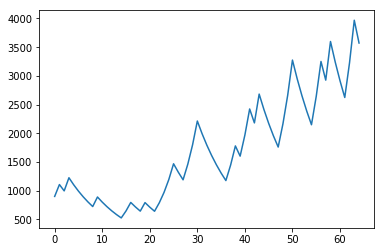

In [178]:
money_history = []
money = 1000
frac = 0.1
total_staked = 0
total_won = 0
for row in df_italy_b.itertuples():
    if row.probtie >= 0.337:
        stake = frac * money
        money -= stake
        total_staked += stake
        if row.result == "D":
            money += stake * 3.3
            total_won += stake * 3.3
        money_history.append(money)
plt.plot(money_history)
print("money at end £{}".format(money))
print("total matches {}".format(len(money_history)))
print("lowest bank £{}".format(min(money_history)))
print("highest bank £{}".format(max(money_history)))
print("ROI {}%".format(100 * (round((total_won / total_staked) - 1, 2))))
print("Percent of matches bet on {}".format(round(len(money_history) * 100 / len(df_rus), 2)))